In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Sample data
#data = {
#    'Location': ['A', 'B', 'C', 'D', 'E'],
#    'Predicted Zone': ['High', 'Low', 'Mid', 'High', 'Low'],
#    'Speed Limit': [50, 60, 40, 70, 30],
#    'Speed': [70, 90, 45, 85, 25],
#    'Reason': ['high risk', 'low visibility', 'construction', 'high risk', 'low visibility'],
#    'Number of Accidents': [10, 2, 1, 5, 3]
#}
#df = pd.DataFrame(data)

In [ ]:
# Load the external data set
df = pd.read_csv('acc_zones.csv')

In [ ]:
# Define the target labels
target = []
for limit, speed, reason, accidents in zip(df['Speed Limit'], df['Speed'], df['Reason'], df['Number of Accidents']):
    if reason == 'high risk':
        target.append('Harsh Action')
    elif speed > limit*1.2 and accidents > 5:
        target.append('Harsh Action')
    elif speed > limit*1.2:
        target.append('Warning')
    elif speed > limit and accidents > 3:
        target.append('Warning')
    else:
        target.append('No Action') 

In [ ]:
# Define the features
features = df.drop(['Location', 'Reason', 'Predicted Zone'], axis=1)

In [ ]:
# Train the decision tree model
tree = DecisionTreeClassifier()
tree.fit(features, target)

DecisionTreeClassifier()

In [ ]:
# Take input from user
location = input("Enter the location of the zone: ")
predicted_zone = input("Enter the predicted zone of the location: ")
speed_limit = float(input("Enter the speed limit of the zone: "))
speed = float(input("Enter the speed of the vehicle: "))
reason = input("Enter the reason for the zone being high risk (if applicable): ")
accidents = int(input("Enter the number of accidents that have occurred in the zone: "))

Enter the location of the zone: Hope College
Enter the predicted zone of the location: High
Enter the speed limit of the zone: 50
Enter the speed of the vehicle: 55
Enter the reason for the zone being high risk (if applicable): Over Speed
Enter the number of accidents that have occurred in the zone: 56


In [ ]:
# Create a DataFrame with the input values
input_data = pd.DataFrame({
    'Location': [location],
    'Number of Accidents': [accidents],
    'Reason': [reason],
    'Speed Limit': [speed_limit],
    'Predicted Zone': [predicted_zone],
    'Speed': [speed]
})

In [ ]:
# Extract the features from the input DataFrame
input_features = input_data.drop(['Location', 'Reason', 'Predicted Zone'], axis=1)

In [ ]:
# Make a prediction for the input values
decision = tree.predict(input_features)

In [ ]:
# Print the decision
print("The decision for the given input is:", decision[0])

The decision for the given input is: Warning


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

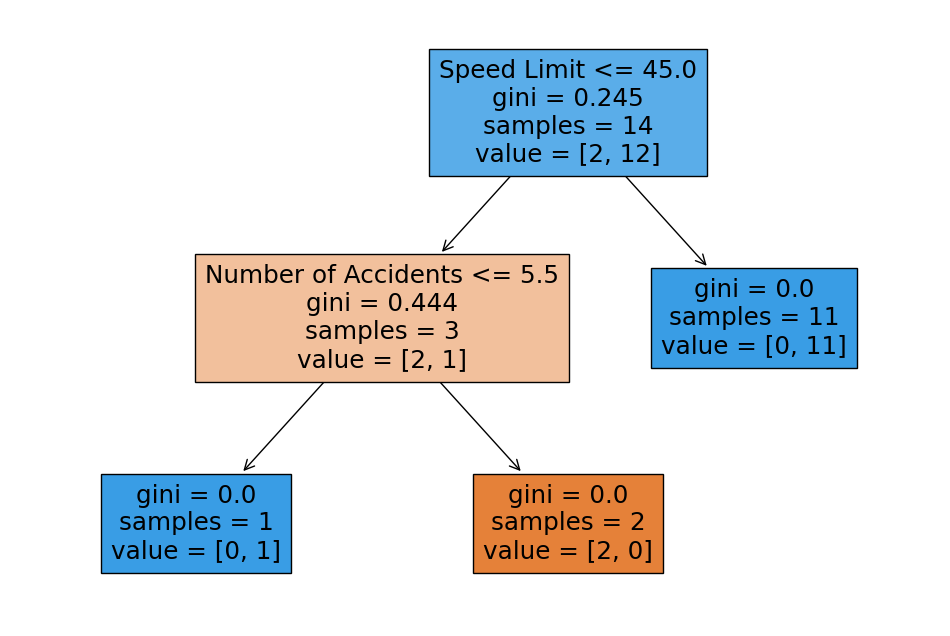

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=features.columns)
plt.show()